# Recurrent Neural Network

## Stock price predection

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras

# Set random seed
np.random.seed(42)

# Configure plotting settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

# Additional imports
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data into a pandas dataframe
stock = pd.read_csv('Downloads/UBER.csv')

In [3]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,30.590000,32.500000,30.459999,32.439999,32.439999,29416300
1,2022-04-26,32.040001,32.200001,31.000000,31.330000,31.330000,26981900
2,2022-04-27,31.100000,31.980000,30.160000,30.680000,30.680000,30762600
3,2022-04-28,31.000000,32.869999,30.980000,32.820000,32.820000,30251600
4,2022-04-29,32.520000,33.150002,31.410000,31.480000,31.480000,24948600


In [4]:
# Set the date column as the index
stock.set_index('Date', inplace=True)

In [5]:
stock = stock.sort_values(by='Date')

In [6]:
#Drop the columns we don't need
stock = stock.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [7]:
stock

,Close
Date,
2022-04-25,32.439999
2022-04-26,31.330000
2022-04-27,30.680000
2022-04-28,32.820000
2022-04-29,31.480000
...,...
2023-04-17,32.080002
2023-04-18,31.730000
2023-04-19,32.040001


In [8]:
stock.info

<bound method DataFrame.info of                 Close
Date                 
2022-04-25  32.439999
2022-04-26  31.330000
2022-04-27  30.680000
2022-04-28  32.820000
2022-04-29  31.480000
...               ...
2023-04-17  32.080002
2023-04-18  31.730000
2023-04-19  32.040001
2023-04-20  31.500000
2023-04-21  30.830000

[250 rows x 1 columns]>

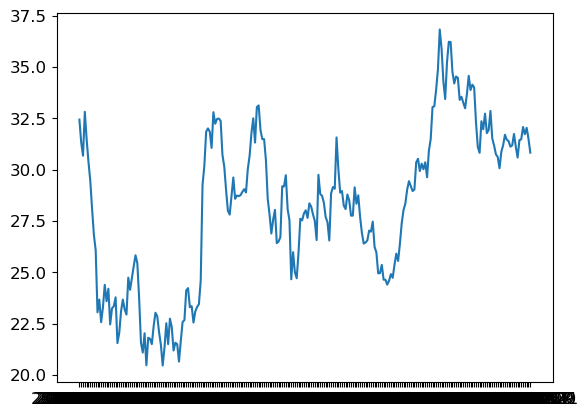

In [9]:
#Plot stock price
plt.plot(stock['Close'])

plt.show()

In [10]:
# Remove all null values
stock = stock.dropna()

In [11]:
stock

,Close
Date,
2022-04-25,32.439999
2022-04-26,31.330000
2022-04-27,30.680000
2022-04-28,32.820000
2022-04-29,31.480000
...,...
2023-04-17,32.080002
2023-04-18,31.730000
2023-04-19,32.040001


In [12]:
closing_price = stock["Close"][-100:]

In [13]:
stock = pd.DataFrame({'Date': closing_price.index, 'Close': closing_price.values})
stock

,Date,Close
0,2022-11-28,27.760000
1,2022-11-29,27.760000
2,2022-11-30,29.139999
3,2022-12-01,28.340000
4,2022-12-02,28.750000
...,...,...
95,2023-04-17,32.080002
96,2023-04-18,31.730000
97,2023-04-19,32.040001
98,2023-04-20,31.500000


## Reshape the data

In [14]:
#reshape the data
stock.shape[0]/10

10.0

In [15]:
stock.groupby(['Date']).count()

,Close
Date,
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
2022-12-02,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [16]:
stock_count = pd.DataFrame(stock.groupby(['Date']).count()['Close'])

stock_count

,Close
Date,
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
2022-12-02,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [17]:
stock_t = np.array(stock['Close']).reshape(10,10)

stock_t

array([[27.76    , 27.76    , 29.139999, 28.34    , 28.75    , 27.700001,
        26.92    , 26.4     , 26.450001, 26.549999],
       [27.030001, 26.98    , 27.469999, 26.24    , 25.969999, 24.950001,
        24.959999, 25.360001, 24.639999, 24.639999],
       [24.4     , 24.59    , 24.91    , 24.73    , 25.360001, 25.91    ,
        25.549999, 26.4     , 27.4     , 28.040001],
       [28.35    , 29.030001, 29.440001, 29.200001, 28.959999, 29.030001,
        30.360001, 30.530001, 29.93    , 30.290001],
       [30.02    , 30.360001, 29.629999, 30.93    , 31.49    , 33.049999,
        33.09    , 33.900002, 34.900002, 36.830002],
       [35.889999, 34.299999, 33.439999, 35.23    , 36.23    , 36.220001,
        34.77    , 34.200001, 34.540001, 34.470001],
       [33.400002, 33.549999, 33.259998, 32.990002, 33.689999, 34.57    ,
        33.880001, 34.139999, 34.009998, 32.32    ],
       [31.110001, 30.82    , 32.360001, 31.969999, 32.73    , 31.780001,
        31.93    , 32.860001, 31.52  

In [18]:
# Convert to dataframe

stock_convert = pd.DataFrame(stock_t, columns=np.arange(0,10,1))

stock_convert

,0,1,2,3,4,5,6,7,8,9
0,27.760000,27.760000,29.139999,28.340000,28.750000,27.700001,26.920000,26.400000,26.450001,26.549999
1,27.030001,26.980000,27.469999,26.240000,25.969999,24.950001,24.959999,25.360001,24.639999,24.639999
2,24.400000,24.590000,24.910000,24.730000,25.360001,25.910000,25.549999,26.400000,27.400000,28.040001
3,28.350000,29.030001,29.440001,29.200001,28.959999,29.030001,30.360001,30.530001,29.930000,30.290001
4,30.020000,30.360001,29.629999,30.930000,31.490000,33.049999,33.090000,33.900002,34.900002,36.830002
5,35.889999,34.299999,33.439999,35.230000,36.230000,36.220001,34.770000,34.200001,34.540001,34.470001
6,33.400002,33.549999,33.259998,32.990002,33.689999,34.570000,33.880001,34.139999,34.009998,32.320000
7,31.110001,30.820000,32.360001,31.969999,32.730000,31.780001,31.930000,32.860001,31.520000,31.180000
8,30.750000,30.620001,30.070000,30.870001,31.190001,31.700001,31.459999,31.389999,31.120001,31.180000
9,31.740000,31.120001,30.590000,31.440001,31.480000,32.080002,31.730000,32.040001,31.500000,30.830000


In [19]:
row_count = stock.shape[0]
row_count

100

In [20]:
closing_prices = stock['Close'].values

In [21]:
print(closing_prices)

[27.76     27.76     29.139999 28.34     28.75     27.700001 26.92
 26.4      26.450001 26.549999 27.030001 26.98     27.469999 26.24
 25.969999 24.950001 24.959999 25.360001 24.639999 24.639999 24.4
 24.59     24.91     24.73     25.360001 25.91     25.549999 26.4
 27.4      28.040001 28.35     29.030001 29.440001 29.200001 28.959999
 29.030001 30.360001 30.530001 29.93     30.290001 30.02     30.360001
 29.629999 30.93     31.49     33.049999 33.09     33.900002 34.900002
 36.830002 35.889999 34.299999 33.439999 35.23     36.23     36.220001
 34.77     34.200001 34.540001 34.470001 33.400002 33.549999 33.259998
 32.990002 33.689999 34.57     33.880001 34.139999 34.009998 32.32
 31.110001 30.82     32.360001 31.969999 32.73     31.780001 31.93
 32.860001 31.52     31.18     30.75     30.620001 30.07     30.870001
 31.190001 31.700001 31.459999 31.389999 31.120001 31.18     31.74
 31.120001 30.59     31.440001 31.48     32.080002 31.73     32.040001
 31.5      30.83    ]


## standardization the data

In [22]:
stock_feature = np.array(stock_convert).ravel().reshape(-1,1)

stock_feature.shape

(100, 1)

In [23]:
stock_feature

array([[27.76    ],
       [27.76    ],
       [29.139999],
       [28.34    ],
       [28.75    ],
       [27.700001],
       [26.92    ],
       [26.4     ],
       [26.450001],
       [26.549999],
       [27.030001],
       [26.98    ],
       [27.469999],
       [26.24    ],
       [25.969999],
       [24.950001],
       [24.959999],
       [25.360001],
       [24.639999],
       [24.639999],
       [24.4     ],
       [24.59    ],
       [24.91    ],
       [24.73    ],
       [25.360001],
       [25.91    ],
       [25.549999],
       [26.4     ],
       [27.4     ],
       [28.040001],
       [28.35    ],
       [29.030001],
       [29.440001],
       [29.200001],
       [28.959999],
       [29.030001],
       [30.360001],
       [30.530001],
       [29.93    ],
       [30.290001],
       [30.02    ],
       [30.360001],
       [29.629999],
       [30.93    ],
       [31.49    ],
       [33.049999],
       [33.09    ],
       [33.900002],
       [34.900002],
       [36.830002],


In [24]:
# Scale the data between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
closing_prices=scaler.fit_transform(np.array(closing_prices).reshape(-1,1))

In [25]:
print(closing_prices)

[[0.27031371]
 [0.27031371]
 [0.38133534]
 [0.31697501]
 [0.34995972]
 [0.26548676]
 [0.20273529]
 [0.16090102]
 [0.16492363]
 [0.17296852]
 [0.21158492]
 [0.20756232]
 [0.24698299]
 [0.14802894]
 [0.12630722]
 [0.04424786]
 [0.04505221]
 [0.07723257]
 [0.01930804]
 [0.01930804]
 [0.        ]
 [0.0152856 ]
 [0.04102976]
 [0.02654867]
 [0.07723257]
 [0.12148027]
 [0.09251801]
 [0.16090102]
 [0.24135153]
 [0.29283994]
 [0.31777951]
 [0.37248594]
 [0.40547065]
 [0.38616253]
 [0.36685425]
 [0.37248594]
 [0.47948512]
 [0.49316171]
 [0.44489132]
 [0.47385358]
 [0.45213187]
 [0.47948512]
 [0.42075609]
 [0.52534183]
 [0.57039412]
 [0.69589683]
 [0.69911493]
 [0.76428001]
 [0.84473052]
 [1.        ]
 [0.92437628]
 [0.79645997]
 [0.72727253]
 [0.87127902]
 [0.95172953]
 [0.95092511]
 [0.83427179]
 [0.78841508]
 [0.81576825]
 [0.81013672]
 [0.72405475]
 [0.73612209]
 [0.71279136]
 [0.69107004]
 [0.74738516]
 [0.81818169]
 [0.76267092]
 [0.78358789]
 [0.77312924]
 [0.63716804]
 [0.539823  ]
 [0.51

## Reshaping the data

In [26]:
stock_reshaped = closing_prices.reshape(10,10)
stock_reshaped.shape

(10, 10)

In [27]:
# Pandas version of the reshaped data

pd.DataFrame(stock_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,0.270314,0.270314,0.381335,0.316975,0.349960,0.265487,0.202735,0.160901,0.164924,0.172969
1,0.211585,0.207562,0.246983,0.148029,0.126307,0.044248,0.045052,0.077233,0.019308,0.019308
2,0.000000,0.015286,0.041030,0.026549,0.077233,0.121480,0.092518,0.160901,0.241352,0.292840
3,0.317780,0.372486,0.405471,0.386163,0.366854,0.372486,0.479485,0.493162,0.444891,0.473854
4,0.452132,0.479485,0.420756,0.525342,0.570394,0.695897,0.699115,0.764280,0.844731,1.000000
5,0.924376,0.796460,0.727273,0.871279,0.951730,0.950925,0.834272,0.788415,0.815768,0.810137
6,0.724055,0.736122,0.712791,0.691070,0.747385,0.818182,0.762671,0.783588,0.773129,0.637168
7,0.539823,0.516492,0.640386,0.609010,0.670153,0.593725,0.605792,0.680611,0.572808,0.545454
8,0.510861,0.500402,0.456154,0.520515,0.546259,0.587289,0.567981,0.562349,0.540628,0.545454
9,0.590507,0.540628,0.497989,0.566372,0.569590,0.617860,0.589702,0.614642,0.571199,0.517297


## Splitting dataset into train and test split

In [28]:

training_size = int(len(closing_prices)*0.80)
test_size = len(closing_prices)-training_size
train_data,test_data = closing_prices[0:training_size,:],closing_prices[training_size:len(closing_prices),:1]

In [29]:
training_size,test_size

(80, 20)

In [30]:
train_data

array([[0.27031371],
       [0.27031371],
       [0.38133534],
       [0.31697501],
       [0.34995972],
       [0.26548676],
       [0.20273529],
       [0.16090102],
       [0.16492363],
       [0.17296852],
       [0.21158492],
       [0.20756232],
       [0.24698299],
       [0.14802894],
       [0.12630722],
       [0.04424786],
       [0.04505221],
       [0.07723257],
       [0.01930804],
       [0.01930804],
       [0.        ],
       [0.0152856 ],
       [0.04102976],
       [0.02654867],
       [0.07723257],
       [0.12148027],
       [0.09251801],
       [0.16090102],
       [0.24135153],
       [0.29283994],
       [0.31777951],
       [0.37248594],
       [0.40547065],
       [0.38616253],
       [0.36685425],
       [0.37248594],
       [0.47948512],
       [0.49316171],
       [0.44489132],
       [0.47385358],
       [0.45213187],
       [0.47948512],
       [0.42075609],
       [0.52534183],
       [0.57039412],
       [0.69589683],
       [0.69911493],
       [0.764

## Create Input and Target values

In [31]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=9):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

## Add one more dimension to make it ready for RNNs

In [32]:
# reshape into t=target X=t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9 and Y=t+10
time_step = 9
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(70, 9)
(70,)


(None, None)

In [34]:
print(X_test.shape), print(y_test.shape)

(10, 9)
(10,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
X_train, X_test, y_train, y_test

(array([[[0.27031371],
         [0.27031371],
         [0.38133534],
         [0.31697501],
         [0.34995972],
         [0.26548676],
         [0.20273529],
         [0.16090102],
         [0.16492363]],
 
        [[0.27031371],
         [0.38133534],
         [0.31697501],
         [0.34995972],
         [0.26548676],
         [0.20273529],
         [0.16090102],
         [0.16492363],
         [0.17296852]],
 
        [[0.38133534],
         [0.31697501],
         [0.34995972],
         [0.26548676],
         [0.20273529],
         [0.16090102],
         [0.16492363],
         [0.17296852],
         [0.21158492]],
 
        [[0.31697501],
         [0.34995972],
         [0.26548676],
         [0.20273529],
         [0.16090102],
         [0.16492363],
         [0.17296852],
         [0.21158492],
         [0.20756232]],
 
        [[0.34995972],
         [0.26548676],
         [0.20273529],
         [0.16090102],
         [0.16492363],
         [0.17296852],
         [0.21158492],

In [37]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(70, 9, 1)
(70,)
(10, 9, 1)
(10,)


# MODEL OPERATIONS

## A normal (cross-sectional) neural network using Keras library

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(27, activation='relu'),
    keras.layers.Dense(1, activation=None)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100)

#Predict:
y_pred = model.predict(X_test)


# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()


Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5241
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3933
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2805
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 5/100
3/3 [==============================] - 0s 999us/step - loss: 0.1226
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0721
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 11/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 13/100
3/3 [==============================] - 0s 1ms/

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 27)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 28        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


In [40]:
comparison

,actual,predicted
0,31.180000,31.631176
1,31.740000,31.791355
2,31.120001,32.428295
3,30.590000,31.673273
4,31.440001,31.266941
5,31.480000,31.401140
6,32.080002,31.565966
7,31.730000,31.752954
8,32.040001,31.606714
9,31.500000,31.818888


In [41]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.3681666913961201

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 12ms/step


(30.284464027744313, 31.124759195980356)

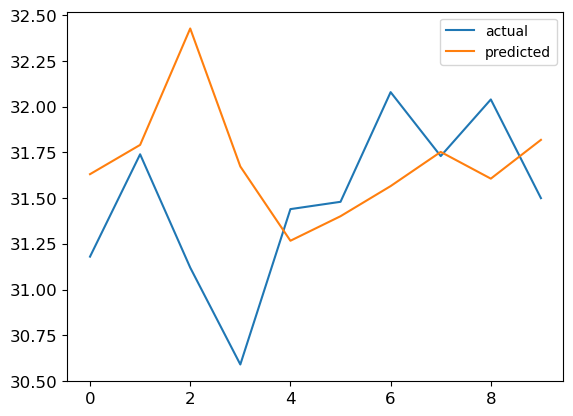

In [43]:

plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simplest recurrent neural network

In [44]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(27, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.4519
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 0.3130
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2035
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1224
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0686
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 13/100
3/3 [==============================] - 0s 2ms/st

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 27)                783       
                                                                 
 dense_2 (Dense)             (None, 1)                 28        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [48]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [49]:
comparison.head(10)

,actual,predicted
0,31.180000,31.536491
1,31.740000,31.370121
2,31.120001,31.476963
3,30.590000,31.636799
4,31.440001,31.389881
5,31.480000,31.192432
6,32.080002,31.385984
7,31.730000,31.707916
8,32.040001,32.064281
9,31.500000,32.039181


In [50]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.23457669812703585

In [51]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 13ms/step


(30.201713095194243, 31.010793380386904)

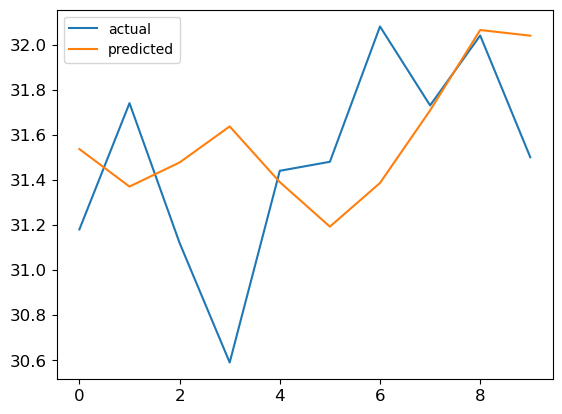

In [52]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

In [53]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(27, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(27, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 1.0457
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7342
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4575
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2524
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1414
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0856
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 13/100
3/3 [==============================] - 0s 2ms/st

In [55]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 118ms/step


In [56]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [57]:
comparison.head(10)

,actual,predicted
0,31.180000,31.545132
1,31.740000,31.467358
2,31.120001,31.668655
3,30.590000,31.461529
4,31.440001,31.195318
5,31.480000,31.490585
6,32.080002,31.500362
7,31.730000,31.924673
8,32.040001,31.926100
9,31.500000,32.160408


In [58]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.2151212692763076

In [59]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 12ms/step


(30.11292166759933, 31.064755071131387)

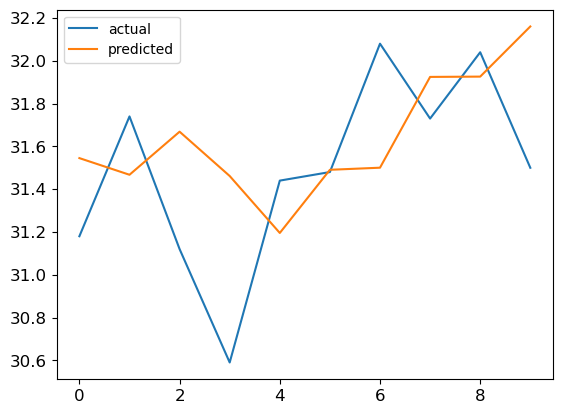

In [60]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM (Long Short-Term Memory) neural network with one layer 

In [61]:
model = keras.models.Sequential([
    keras.layers.LSTM(18, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.2443
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2146
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1992
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1836
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1663
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1502
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0979
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 13/100
3/3 [==============================] - 0s 2ms/st

In [63]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 83ms/step


In [64]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [65]:
comparison.head(10)

,actual,predicted
0,31.180000,31.440306
1,31.740000,31.420551
2,31.120001,31.554213
3,30.590000,31.481867
4,31.440001,31.283039
5,31.480000,31.364342
6,32.080002,31.405819
7,31.730000,31.645357
8,32.040001,31.740507
9,31.500000,31.905069


In [66]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.19072515251056005

In [67]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 16ms/step


(30.133714576175066, 30.95422444629067)

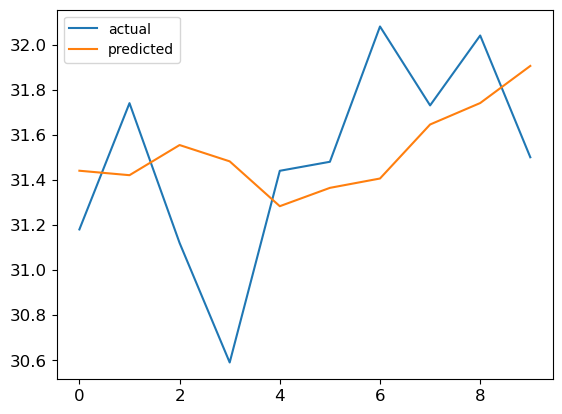

In [68]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM (Long Short-Term Memory) neural network with more layer 

In [69]:
model = keras.models.Sequential([
    keras.layers.LSTM(18, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(18, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 5ms/step - loss: 0.3398
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2796
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2271
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1799
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1375
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0971
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0654
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0255
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0249
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0335
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 13/100
3/3 [==============================] - 0s 5ms/st

In [70]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 344ms/step


In [71]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [72]:
comparison.head(10)

,actual,predicted
0,31.180000,31.375837
1,31.740000,31.431326
2,31.120001,31.524654
3,30.590000,31.588411
4,31.440001,31.541956
5,31.480000,31.526917
6,32.080002,31.511669
7,31.730000,31.578888
8,32.040001,31.647558
9,31.500000,31.755373


In [73]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.18718612557052036

In [74]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 12ms/step


(30.13757322905671, 30.978036639188584)

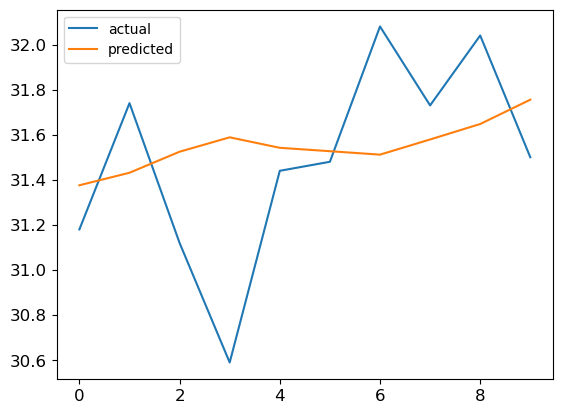

In [75]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU (Gated Recurrent Unit) neural network with multiple layers 

In [76]:
model = keras.models.Sequential([
    keras.layers.GRU(18, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(27, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 5ms/step - loss: 0.3177
Epoch 2/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 3/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2325
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 0.2057
Epoch 5/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1795
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 0.1558
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 0.1317
Epoch 8/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 9/30
3/3 [==============================] - 0s 3ms/step - loss: 0.0915
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 11/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 12/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 13/30
3/3 [==============================] - 0s 4ms/step - loss: 0.

In [77]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 151ms/step


In [78]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [79]:
comparison.head(10)

,actual,predicted
0,31.180000,31.893702
1,31.740000,31.895254
2,31.120001,31.989985
3,30.590000,31.992687
4,31.440001,31.854889
5,31.480000,31.844261
6,32.080002,31.887768
7,31.730000,32.047680
8,32.040001,32.164455
9,31.500000,32.298038


In [80]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.4352923531331238

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 11ms/step


(30.473689926883427, 31.416793080002)

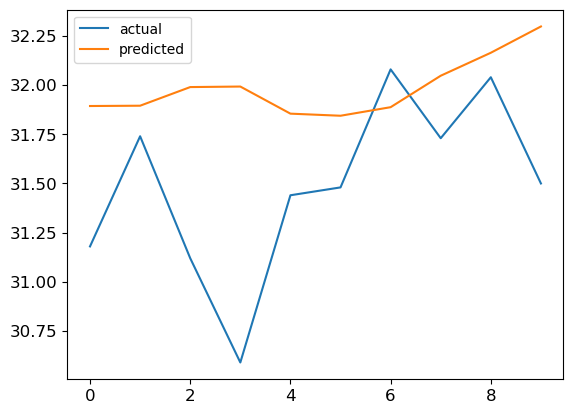

In [82]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## 1D convolutional neural network using Keras 

In [83]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.3223
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2611
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2097
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1622
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1147
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0678
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 13/100
3/3 [==============================] - 0s 3ms/st

In [84]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 150ms/step


In [85]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [86]:
comparison.head(10)

,actual,predicted
0,31.180000,31.933279
1,31.740000,31.862413
2,31.120001,31.939201
3,30.590000,31.868858
4,31.440001,31.712715
5,31.480000,31.735258
6,32.080002,31.761824
7,31.730000,32.056858
8,32.040001,32.198570
9,31.500000,32.403042


In [87]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.40772143494876933

In [88]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(y_test,test_predict)) ### Test Data RMSE

1/1 [==============================] - 0s 12ms/step


(30.30886475893147, 31.377479691455534)

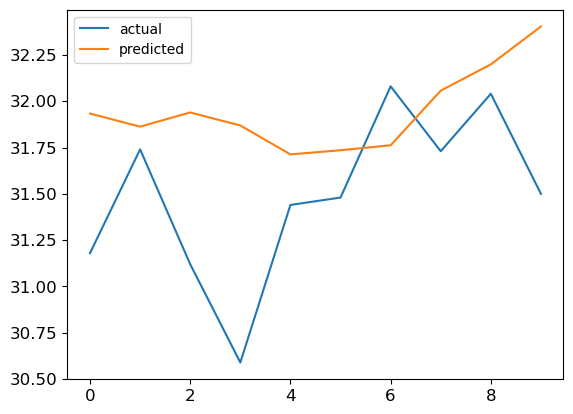

In [89]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Inference:
### Based on the mean squared error (MSE) values reported, the best model for stock price prediction for UBER. would be the Simple RNN model with more layers, with an MSE of 0.19 The lower MSE value indicates that this model has better predictive accuracy compared to the other models evaluated.

### The main differences between the Simple RNN model and the other models evaluated are in their architecture and approach to learning. The Simple RNN model uses recurrent connections to maintain a memory of previous inputs, enabling it to learn and make predictions based on sequential data. However all the models perform well the Simple RNN model provides the best results.

### In conclusion, the Simple RNN model with more layers is the best approach for stock price prediction for UBER, based on the MSE values reported. The model's ability to learn sequential data, maintain a memory of previous inputs, and computational efficiency are the primary factors that make it a suitable approach for this task.